# Numerical representation

Below are several examples for making plots and some exercises to practice making your own.

The commands below preceded with "!" can be typed on the command line of your terminal.

## 1 plotting examples

Below we will build two programs, one to simulate radioactice decay and another to calculate the values of several Bessel functions using two different recursion relations as described in the assigned reading from Landau.

In [1]:
# to build your code type the 'make' command
! make  

make: Nothing to be done for `all'.


### 1.1 Run the radioactive dacay simulation, generate a plot of the result
Below we illustrate the use of both gnuplot and the python interface to ROOT to make our plots 

In [2]:
# see decay.cpp for the source code
!decay

data stored in decay01.dat


**gnuplot example**

In [3]:
!gnuplot decay.plt &> /dev/null
!cat decay.plt  # here is the text of our plot file

^C
# simple plot example for radio decay data
set title "Radioisotope decay plot"
set xlabel "time [seconds]"
set ylabel "fraction of atoms remaining"

plot "decay01.dat" pt 4,0.99**x lw 3 lc 'green' title "Binomial Model",\
exp(-0.01*x) ti "Poisson Model" lc 'red'

set term png
set output "decay.png"
replot

reset
set term pop


In [ ]:
# display the plot in our notebook
from IPython.display import Image
Image(filename='decay.png') 

**(py)ROOT example**
This example introduces the use of the following classes:
* [TGraph](https://root.cern.ch/doc/master/classTGraph.html) : a 1D graph
* [TF1](https://root.cern.ch/doc/master/classTF1.html) : a 1D function
* [TCanvas](https://root.cern.ch/doc/master/classTCanvas.html) : the TCanvas is the drawing board for all ROOT plots
* [TLegend](https://root.cern.ch/doc/master/classTLegend.html) : Generate plot legends in ROOT plots

You can modify some of the parameters in the cells below to see the effects on your plot.

In [1]:
import ROOT as r

Welcome to JupyROOT 6.24/02


In [2]:
gDecay=r.TGraph("decay01.dat")
gDecay.SetTitle("Radioisotope decay plot;time [seconds];fraction of atoms remaining")
tfBin=r.TF1("tfbin","pow(0.99,x)",0,500)      # binomial model
tfBin.SetLineColor(r.kGreen)
tfBin.SetLineWidth(3)
tfPoisson=r.TF1("tfbin","exp(-0.01*x)",0,500) # Poisson model
tfPoisson.SetLineStyle(2)
tfPoisson.SetLineColor(r.kRed)

Info in <TCanvas::Print>: pdf file decay.pdf has been created


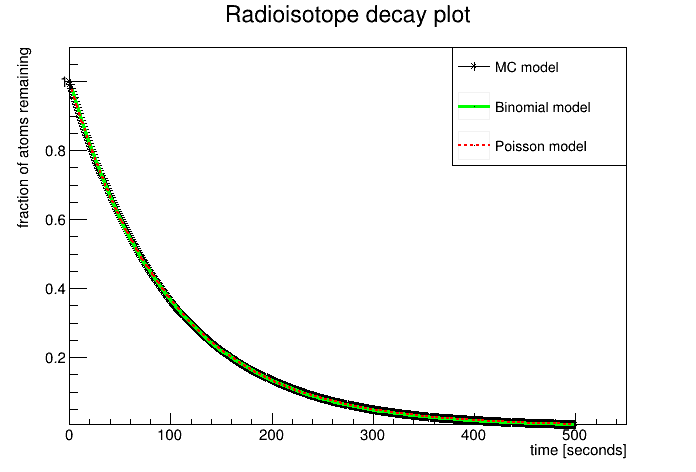

In [3]:
tc=r.TCanvas()
gDecay.Draw("AL*")    # see TGraph docs: plot (A)xes, connect points wil (Line), mark points with (*)
tfBin.Draw("same")
tfPoisson.Draw("same")
tl=r.TLegend(.65,.65,.9,.9)          # (xmin, ymin, xmax, ymax) for legend box
tl.AddEntry(gDecay,"MC model")       
tl.AddEntry(tfBin,"Binomial model")
tl.AddEntry(tfPoisson,"Poisson model")
tl.Draw()
tc.Draw()
tc.Print("decay.pdf")  # a canvas can be "Prined to many graphics formats"

### 1.2 Run the bessel function calculations 
This section follows the description of the Bessel function exercise in Landau

In [4]:
!make runbessel

./bessel 0; mv -v bessel.dat bessel0.dat
Calculating J0(x) for 0.250000 <= x < 40.000000
data stored in bessel.dat.
‘bessel.dat’ -> ‘bessel0.dat’
./bessel 2; mv -v bessel.dat bessel2.dat
Calculating J2(x) for 0.250000 <= x < 40.000000
data stored in bessel.dat.
‘bessel.dat’ -> ‘bessel2.dat’
./bessel 5; mv -v bessel.dat bessel5.dat
Calculating J5(x) for 0.250000 <= x < 40.000000
data stored in bessel.dat.
‘bessel.dat’ -> ‘bessel5.dat’


----

**Project**

* Plot the value of the bessel function J0 in the range calculated by the program for both “upward” and “downward” calculations
* Repeat for J2 and J5 (we'll discusses the obvious issues you discover in the next class)
* Make a (nice looking!) plot displaying the 6 data distributions [ (J0, J2, J5) for up and down calculations ] on one plot

You can use any plotting package you like, as long as it is supported in our phys56xx environment
----

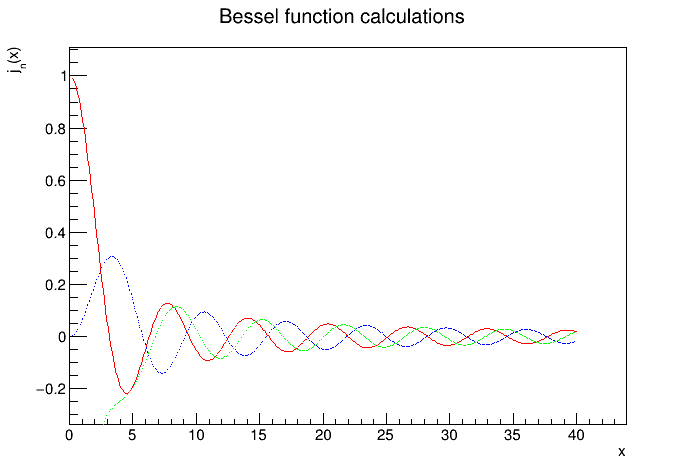

In [23]:
# starter example 
tg_b0dn=r.TGraph("bessel0.dat")
tg_b0dn.SetLineColor(r.kRed)
tg_b0dn.SetTitle("Bessel function calculations;x;j_{n}(x)")
# see https://root.cern.ch/doc/master/classTGraph.html#ab902beb9e0463b225f0f384b6826a434
tg_b2up=r.TGraph("bessel2.dat","%lg %*lg %lg") 
tg_b2up.SetLineColor(r.kBlue)
tg_b2up.SetLineStyle(3)

tg_b5up=r.TGraph("bessel5.dat","%lg %*lg %lg") 
tg_b5up.SetLineColor(r.kGreen)
tg_b5up.SetLineStyle(3)


tg_b0dn.Draw("AC")
tg_b2up.Draw("C")
tg_b5up.Draw("C")
tc.Draw()


    ****************
    YOUR WORK GOES HERE
    ****************
  

## final plot for bessel data goes here

In [24]:
# place your final plot here

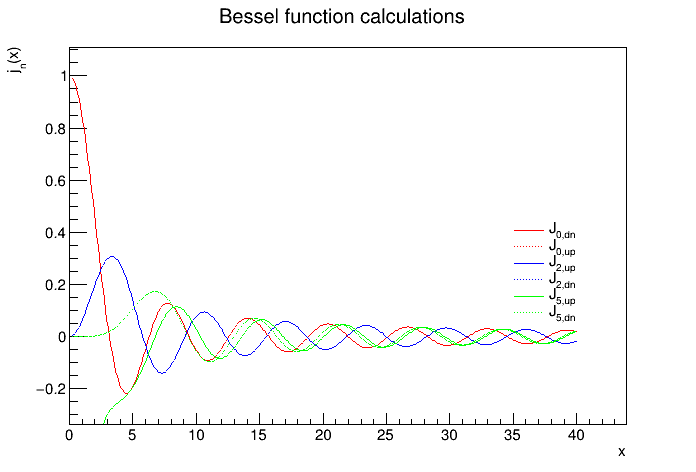

In [25]:
# starter example 
tg_b0dn=r.TGraph("bessel0.dat","%lg %lg %*lg")
tg_b0dn.SetLineColor(r.kRed)

tg_b0up=r.TGraph("bessel0.dat","%lg %*lg %lg")
tg_b0up.SetLineColor(r.kRed)
tg_b0up.SetLineStyle(3)
tg_b0dn.SetTitle("Bessel function calculations;x;j_{n}(x)")
# see https://root.cern.ch/doc/master/classTGraph.html#ab902beb9e0463b225f0f384b6826a434
tg_b2up=r.TGraph("bessel2.dat","%lg %*lg %lg") 
tg_b2up.SetLineColor(r.kBlue)
#tg_b2up.SetLineStyle(3)

tg_b2dn=r.TGraph("bessel2.dat","%lg %lg %*lg") 
tg_b2dn.SetLineColor(r.kBlue)
tg_b2dn.SetLineStyle(3)

tg_b5up=r.TGraph("bessel5.dat","%lg %*lg %lg") 
tg_b5up.SetLineColor(r.kGreen)
#tg_b5up.SetLineStyle(3)

tg_b5dn=r.TGraph("bessel5.dat","%lg %lg %*lg") 
tg_b5dn.SetLineColor(r.kGreen)
tg_b5dn.SetLineStyle(3)


tg_b0dn.Draw("AC")
tg_b0up.Draw("C")
tg_b2up.Draw("C")
tg_b2dn.Draw("C")
tg_b5up.Draw("C")
tg_b5dn.Draw("C")

leg = r.TLegend(.73,.32,.97,.53)
leg.SetBorderSize(0)
leg.SetFillColor(0)
leg.SetFillStyle(0)
leg.SetTextFont(42)
leg.SetTextSize(0.035)
leg.AddEntry(tg_b0dn,"J_{0,dn}","L")
leg.AddEntry(tg_b0up,"J_{0,up}","L")
leg.AddEntry(tg_b2up,"J_{2,up}","L")
leg.AddEntry(tg_b2dn,"J_{2,dn}","L")
leg.AddEntry(tg_b5up,"J_{5,up}","L")
leg.AddEntry(tg_b5dn,"J_{5,dn}","L")
#leg.AddEntry(tg_b2up,"2X_{n,eq}","L")
leg.Draw()

tc.Draw()